In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "emilia-romagna"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,8,Emilia-Romagna,15,2,17,9,26,8,8,...,0.0,243.0,0.0,3.0,11.76,65.38,3.29,0.00,0.00,44.44
1,2020-02-26T18:00:00,8,Emilia-Romagna,20,3,23,23,46,20,21,...,1.0,186.0,0.0,14.0,13.04,50.00,11.29,0.00,50.00,76.92
2,2020-02-27T18:00:00,8,Emilia-Romagna,36,6,42,54,96,50,50,...,0.0,456.0,0.0,31.0,14.29,43.75,10.96,0.00,100.00,108.70
3,2020-02-28T18:00:00,8,Emilia-Romagna,56,6,62,81,143,47,48,...,1.0,244.0,0.0,27.0,9.68,43.36,19.67,0.00,0.00,48.96
4,2020-02-29T17:00:00,8,Emilia-Romagna,86,11,97,116,213,70,72,...,2.0,273.0,0.0,35.0,11.34,45.54,26.37,0.00,83.33,48.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,2021-01-31T17:00:00,8,Emilia-Romagna,2112,206,2318,44550,46868,509,1277,...,22.0,13519.0,3478.0,518.0,8.89,4.95,9.45,36.72,1.48,1.10
342,2021-02-01T17:00:00,8,Emilia-Romagna,2181,207,2388,44219,46607,-261,1051,...,34.0,10269.0,2445.0,-331.0,8.67,5.12,10.23,42.99,0.49,-0.56
343,2021-02-02T17:00:00,8,Emilia-Romagna,2176,198,2374,42938,45312,-1295,879,...,71.0,28432.0,5133.0,-1281.0,8.34,5.24,3.09,17.12,-4.35,-2.78
344,2021-02-03T17:00:00,8,Emilia-Romagna,2122,194,2316,42086,44402,-910,1047,...,75.0,23806.0,4326.0,-852.0,8.38,5.22,4.40,24.20,-2.02,-2.01


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 2, 4, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 2) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 1192
Nuovi tamponi: 25882.0
Percentuale nuovi positivi/nuovi tamponi: 5.0 %
Nuovi guariti: 1725.0
Nuovi deceduti: 58.0
Variazione positivi ricoverati con sintomi: -76.0
Variazione positivi in terapia intensiva: -6.0
Variazione positivi in isolamento dimiciliare: -511.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 2, 4, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-06T17:00:00,8,Emilia-Romagna,2736,241,2977,65190,68167,-1462,1788,...,88.0,11171.0,5979.0,-1489.0,8.10,4.37,16.01,29.90,-0.82,-2.10
1,2020-12-07T17:00:00,8,Emilia-Romagna,2805,239,3044,66437,69481,1314,1891,...,57.0,9865.0,3600.0,1247.0,7.85,4.38,19.17,52.53,-0.83,1.93
2,2020-12-08T17:00:00,8,Emilia-Romagna,2781,234,3015,63507,66522,-2959,1624,...,49.0,16576.0,5111.0,-2930.0,7.76,4.53,9.80,31.77,-2.09,-4.26
3,2020-12-09T17:00:00,8,Emilia-Romagna,2857,233,3090,62753,65843,-679,1079,...,46.0,10483.0,4157.0,-754.0,7.54,4.69,10.29,25.96,-0.43,-1.02
4,2020-12-10T17:00:00,8,Emilia-Romagna,2845,229,3074,61643,64717,-1126,1453,...,72.0,17556.0,4616.0,-1110.0,7.45,4.75,8.28,31.48,-1.72,-1.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-01-31T17:00:00,8,Emilia-Romagna,2112,206,2318,44550,46868,509,1277,...,22.0,13519.0,3478.0,518.0,8.89,4.95,9.45,36.72,1.48,1.10
57,2021-02-01T17:00:00,8,Emilia-Romagna,2181,207,2388,44219,46607,-261,1051,...,34.0,10269.0,2445.0,-331.0,8.67,5.12,10.23,42.99,0.49,-0.56
58,2021-02-02T17:00:00,8,Emilia-Romagna,2176,198,2374,42938,45312,-1295,879,...,71.0,28432.0,5133.0,-1281.0,8.34,5.24,3.09,17.12,-4.35,-2.78
59,2021-02-03T17:00:00,8,Emilia-Romagna,2122,194,2316,42086,44402,-910,1047,...,75.0,23806.0,4326.0,-852.0,8.38,5.22,4.40,24.20,-2.02,-2.01


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

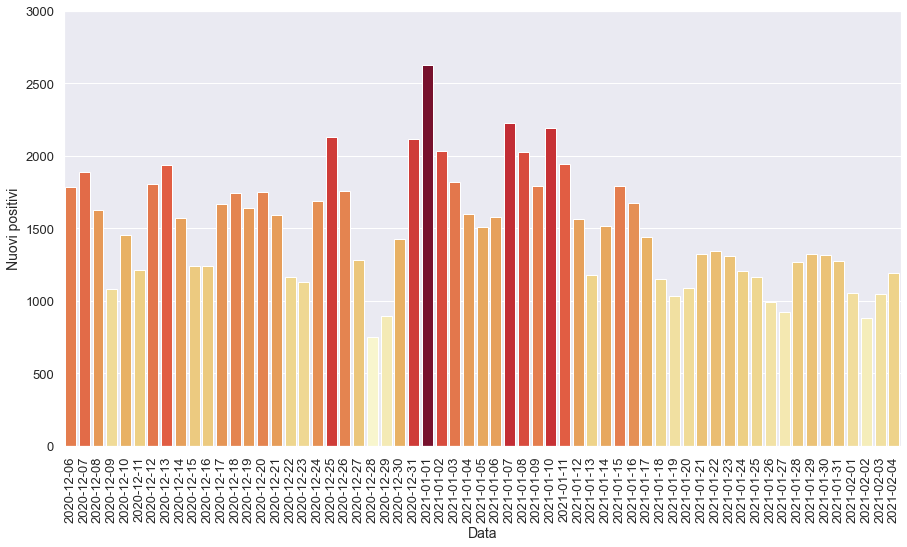

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

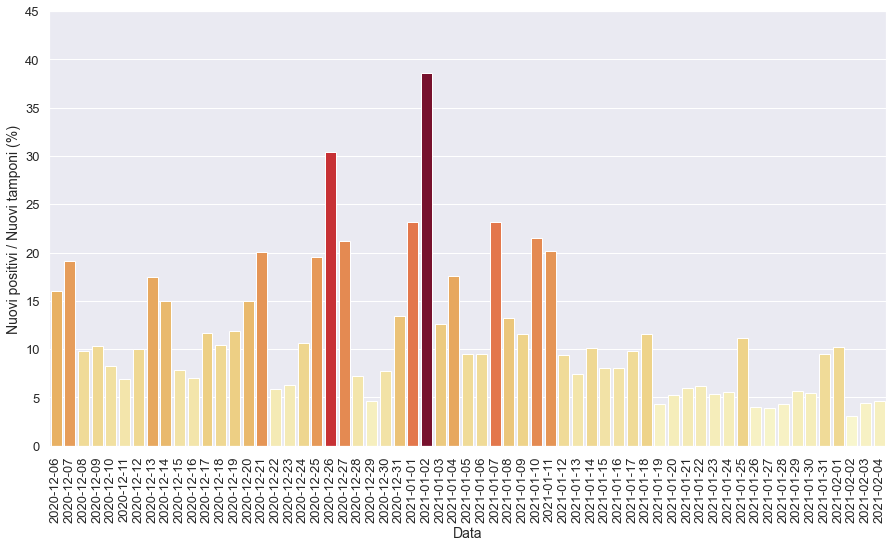

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

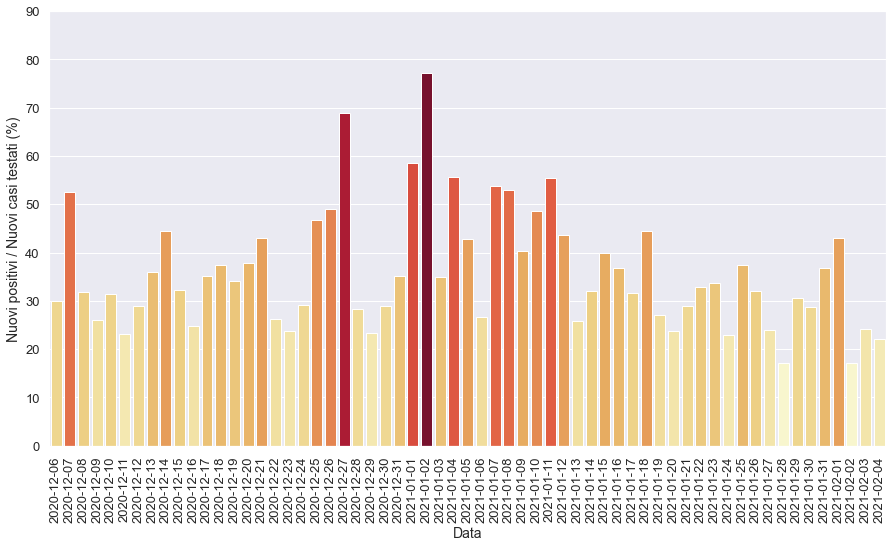

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

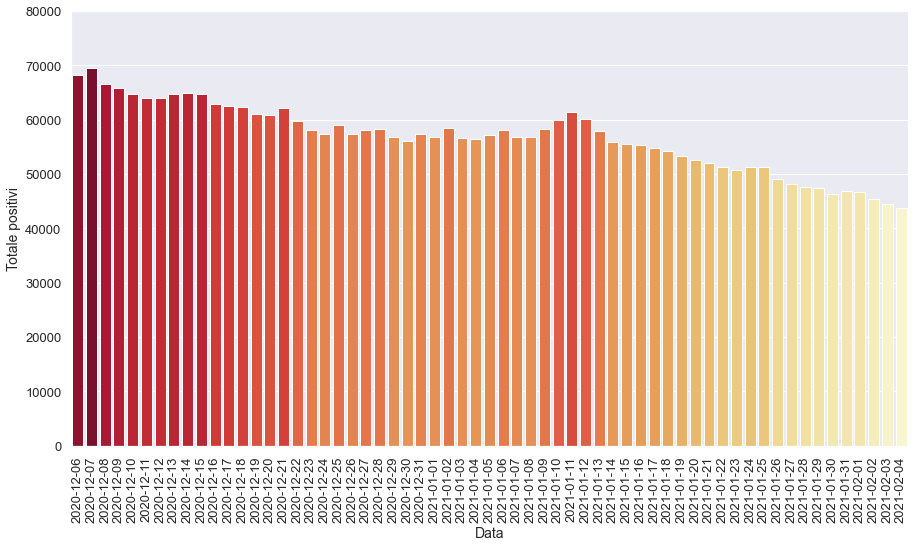

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

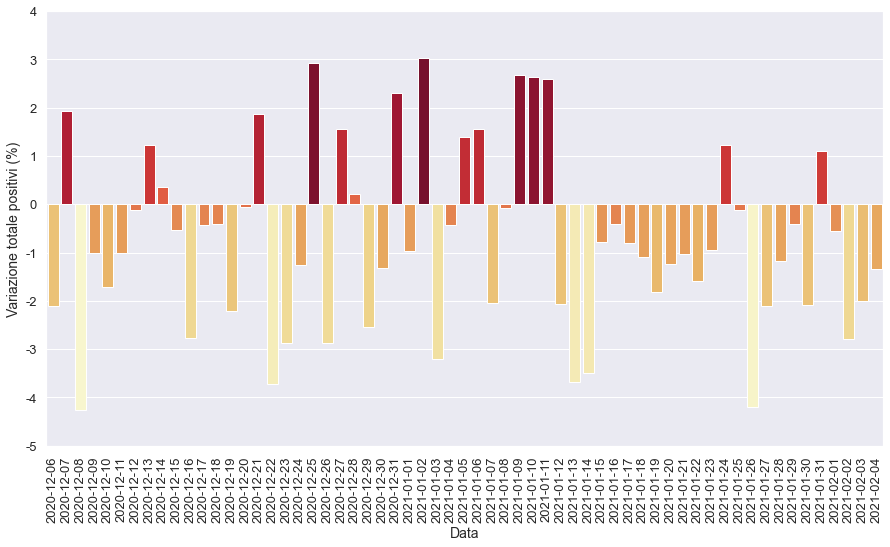

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

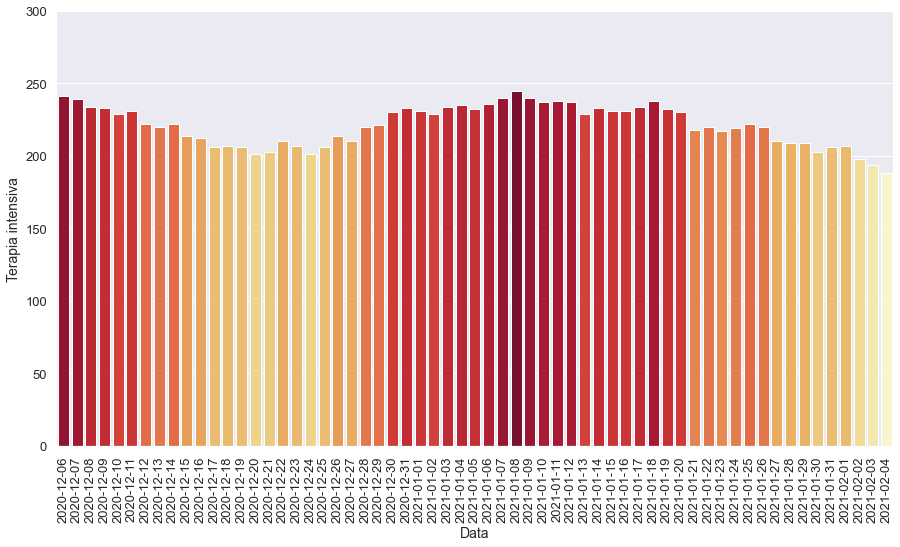

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

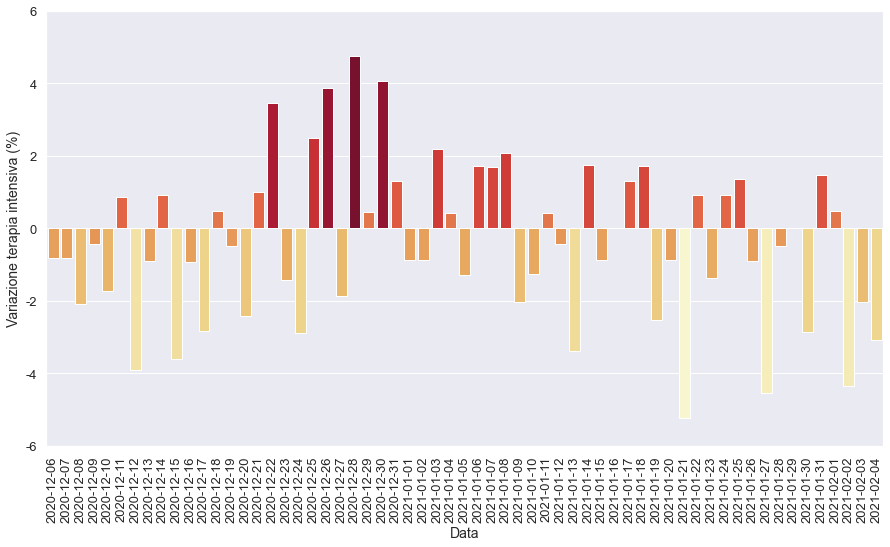

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

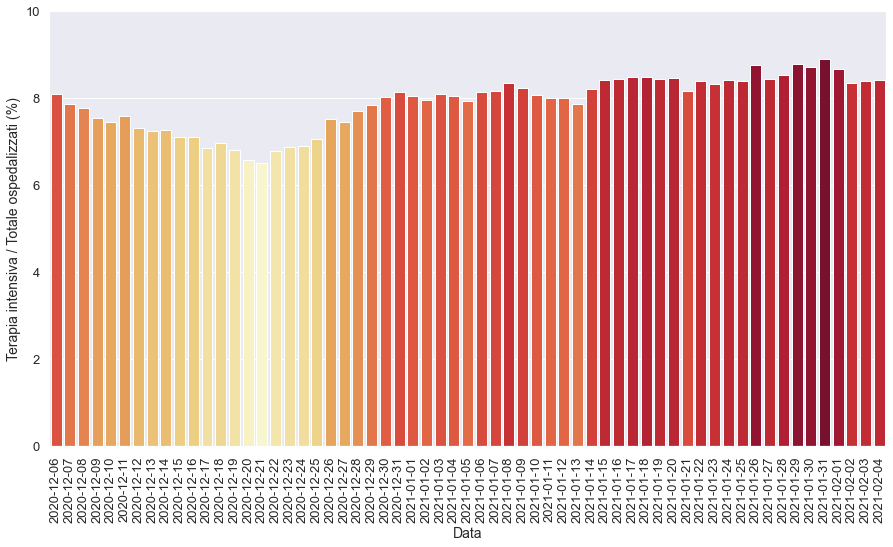

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

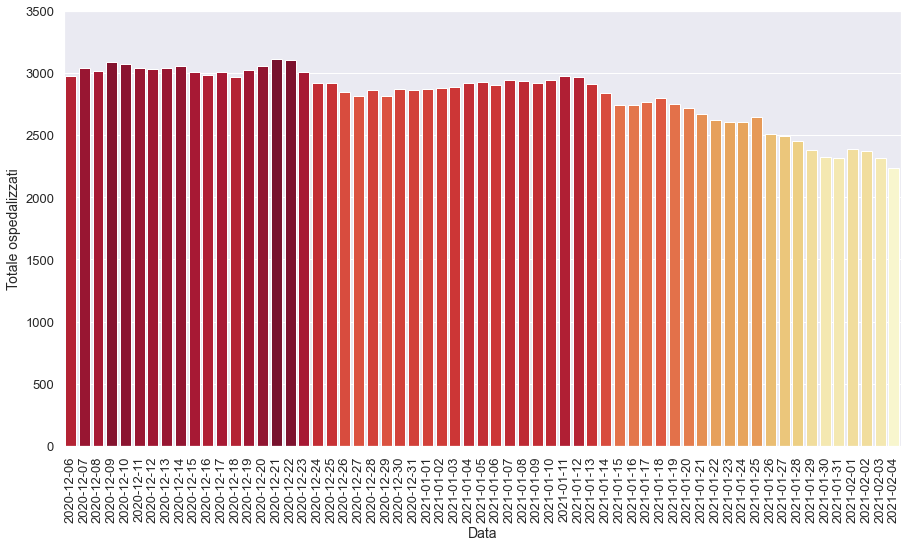

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

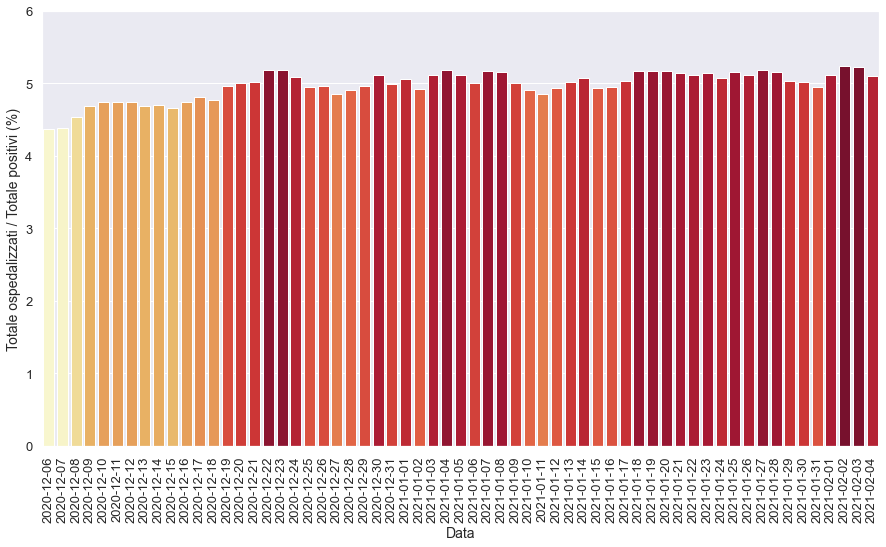

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

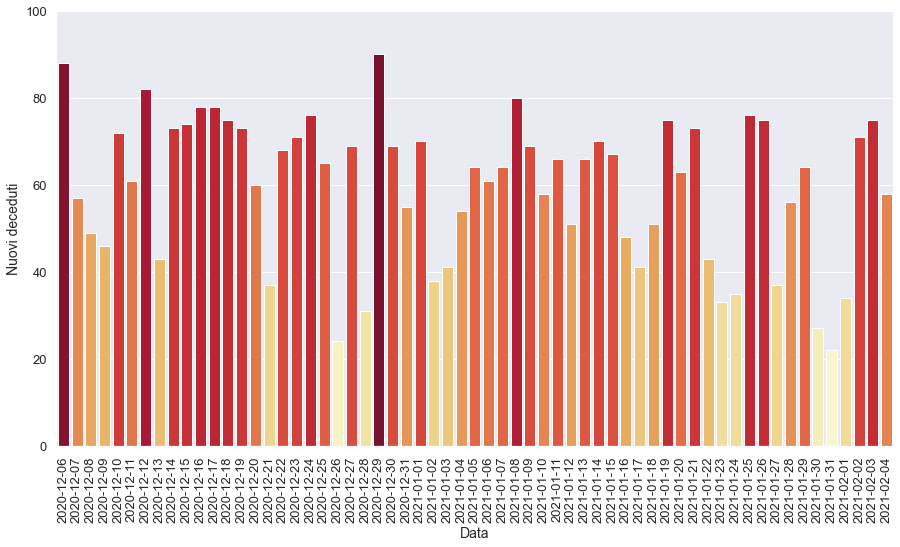

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

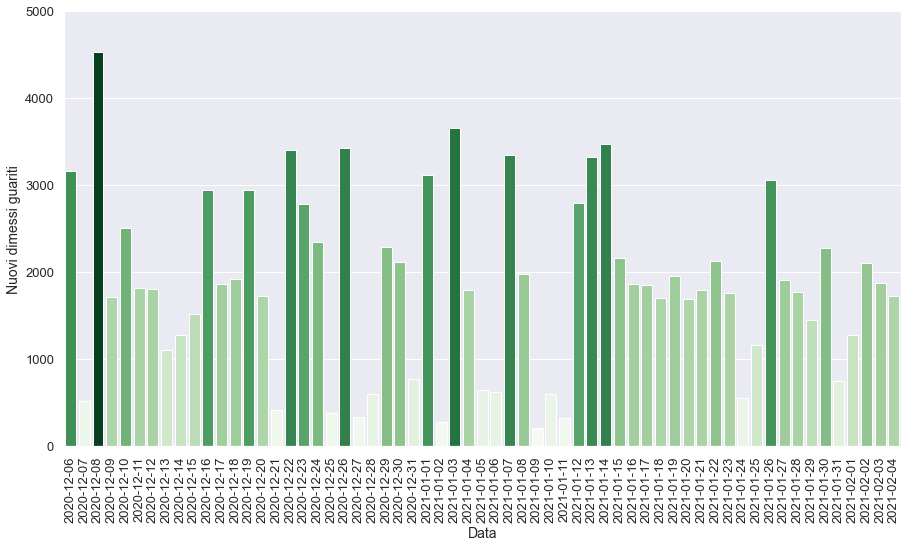

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-01-05T17:00:00,8,Emilia-Romagna,2696,232,2928,54249,57177,792,1506,...,64.0,15795.0,3513.0,783.0,7.92,5.12,9.53,42.87,-1.28,1.40
1,2021-01-06T17:00:00,8,Emilia-Romagna,2665,236,2901,55168,58069,892,1576,...,61.0,16527.0,5912.0,919.0,8.14,5.00,9.54,26.66,1.72,1.56
2,2021-01-07T17:00:00,8,Emilia-Romagna,2701,240,2941,53944,56885,-1184,2228,...,64.0,9629.0,4147.0,-1224.0,8.16,5.17,23.14,53.73,1.69,-2.04
3,2021-01-08T17:00:00,8,Emilia-Romagna,2691,245,2936,53912,56848,-37,2026,...,80.0,15348.0,3826.0,-32.0,8.34,5.16,13.20,52.95,2.08,-0.07
4,2021-01-09T17:00:00,8,Emilia-Romagna,2679,240,2919,55449,58368,1520,1790,...,69.0,15467.0,4447.0,1537.0,8.22,5.00,11.57,40.25,-2.04,2.67
5,2021-01-10T17:00:00,8,Emilia-Romagna,2705,237,2942,56966,59908,1540,2193,...,58.0,10206.0,4518.0,1517.0,8.06,4.91,21.49,48.54,-1.25,2.64
6,2021-01-11T17:00:00,8,Emilia-Romagna,2741,238,2979,58487,61466,1558,1942,...,66.0,9632.0,3510.0,1521.0,7.99,4.85,20.16,55.33,0.42,2.60
7,2021-01-12T17:00:00,8,Emilia-Romagna,2730,237,2967,57225,60192,-1274,1563,...,51.0,16653.0,3588.0,-1262.0,7.99,4.93,9.39,43.56,-0.42,-2.07
8,2021-01-13T17:00:00,8,Emilia-Romagna,2679,229,2908,55072,57980,-2212,1178,...,66.0,15833.0,4559.0,-2153.0,7.87,5.02,7.44,25.84,-3.38,-3.67
9,2021-01-14T17:00:00,8,Emilia-Romagna,2610,233,2843,53105,55948,-2032,1515,...,70.0,15033.0,4724.0,-1967.0,8.20,5.08,10.08,32.07,1.75,-3.50


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

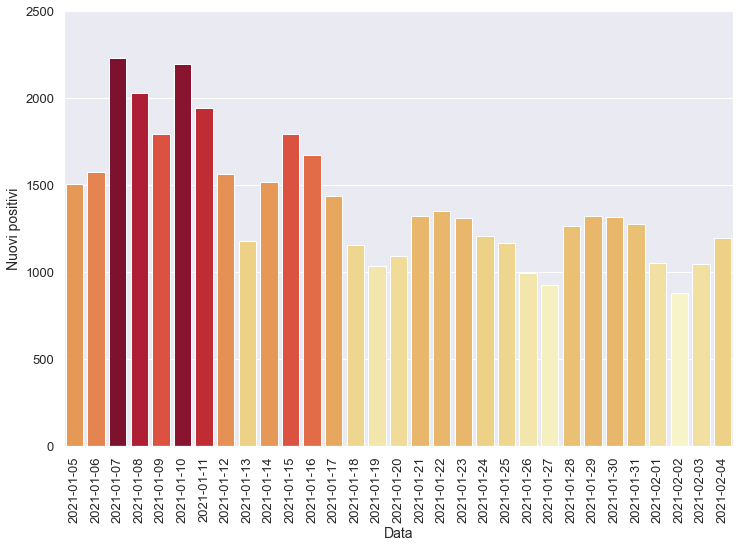

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

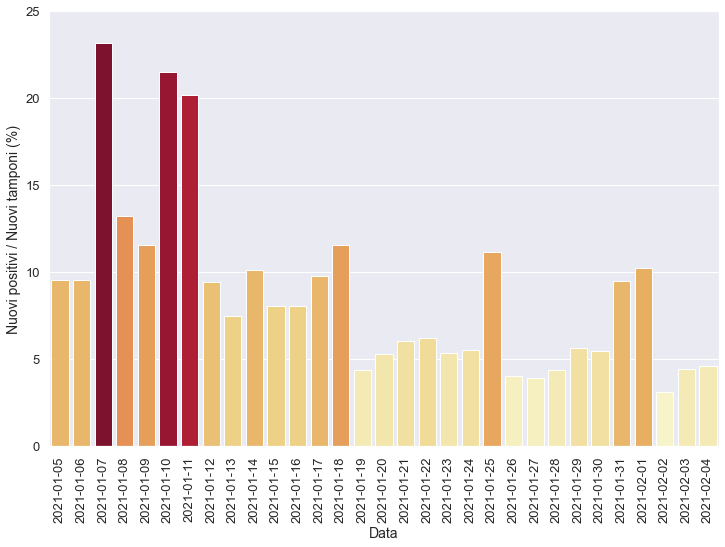

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

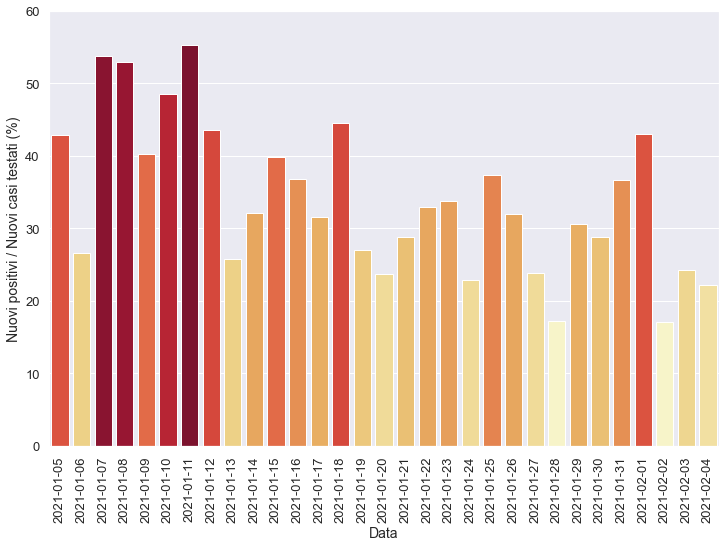

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

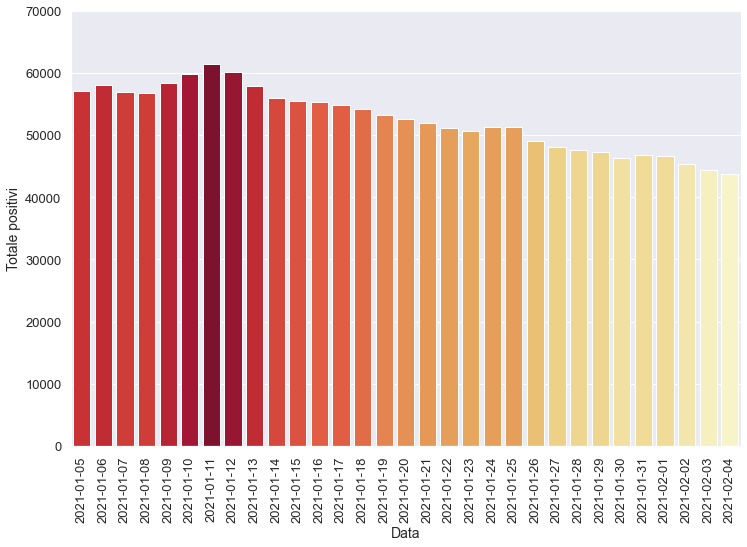

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

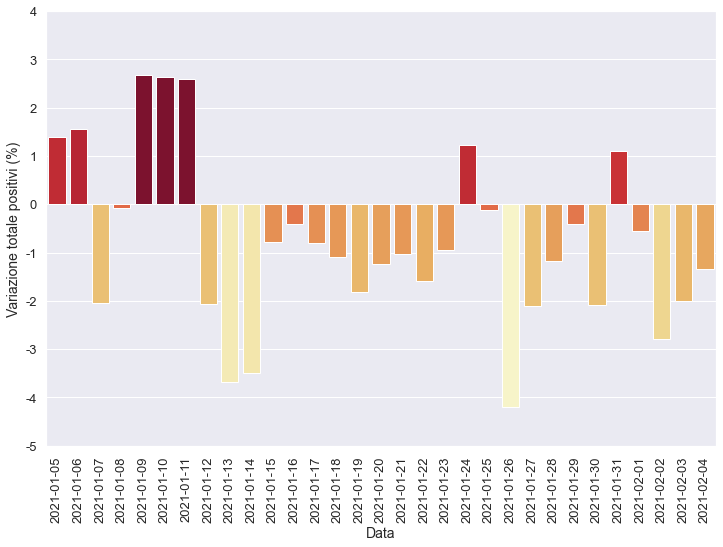

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

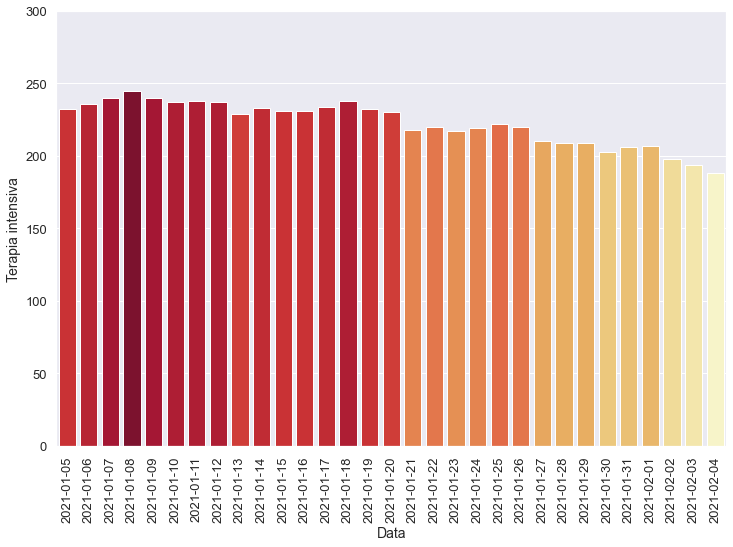

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

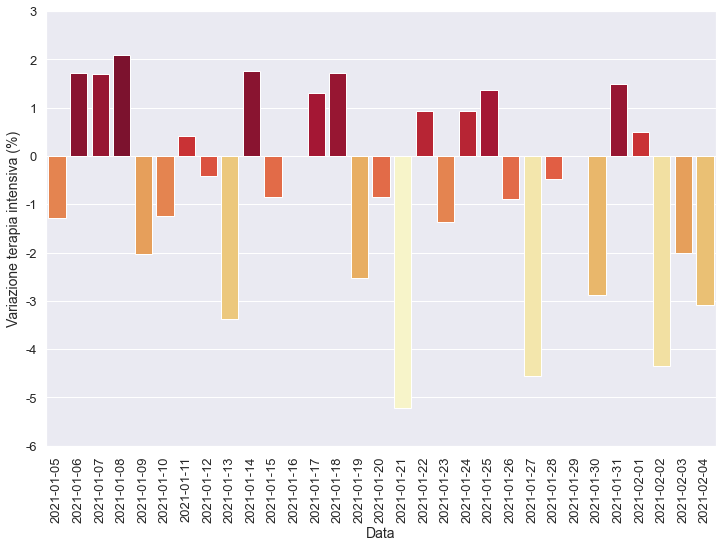

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

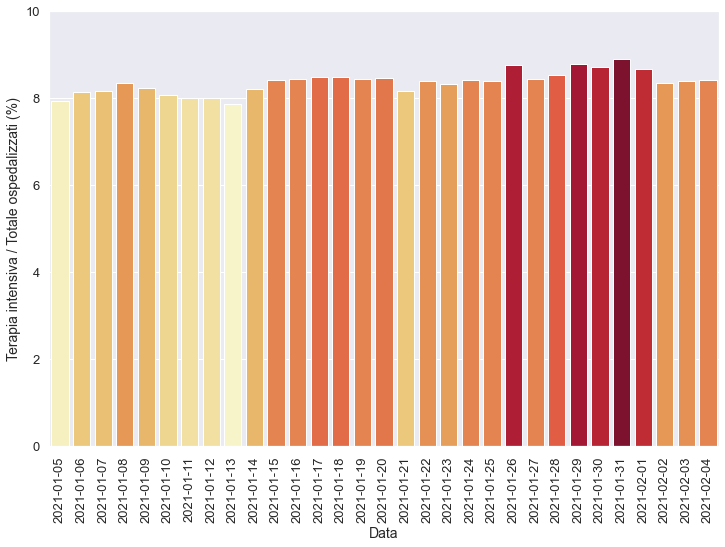

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

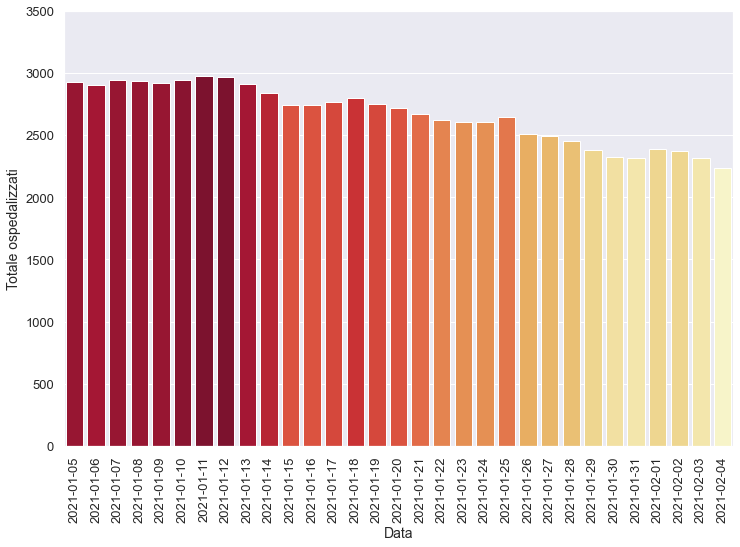

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

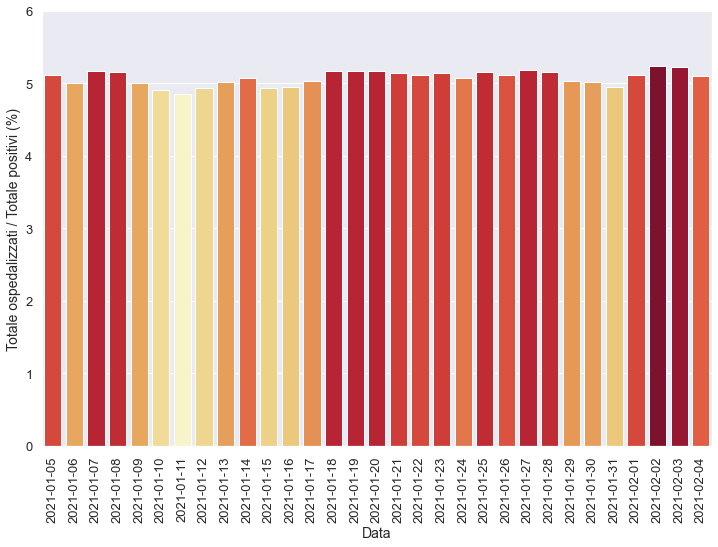

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

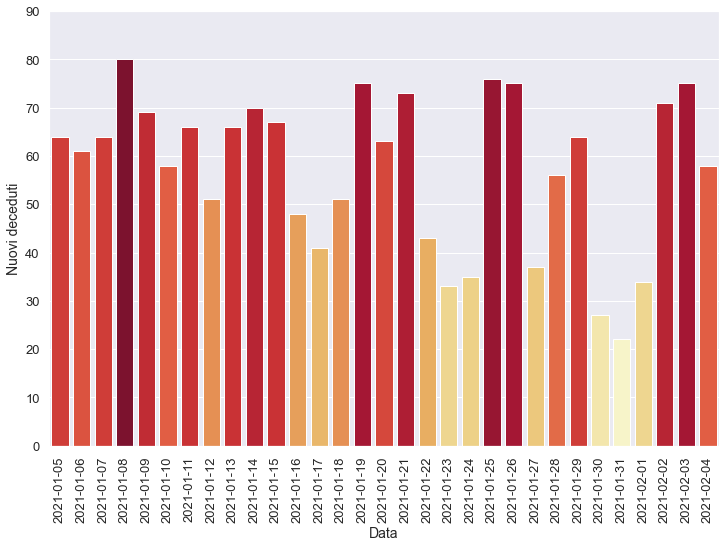

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

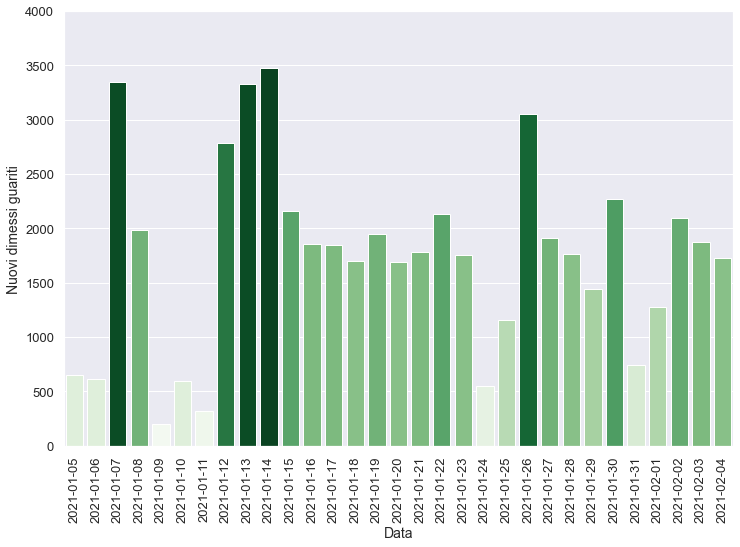

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-01-28T17:00:00,8,Emilia-Romagna,2242,209,2451,45088,47539,-567,1265,...,56.0,29181.0,7360.0,-527.0,8.53,5.16,4.34,17.19,-0.48,-1.18
1,2021-01-29T17:00:00,8,Emilia-Romagna,2172,209,2381,44964,47345,-194,1320,...,64.0,23361.0,4320.0,-124.0,8.78,5.03,5.65,30.56,0.00,-0.41
2,2021-01-30T17:00:00,8,Emilia-Romagna,2124,203,2327,44032,46359,-986,1314,...,27.0,24020.0,4566.0,-932.0,8.72,5.02,5.47,28.78,-2.87,-2.08
3,2021-01-31T17:00:00,8,Emilia-Romagna,2112,206,2318,44550,46868,509,1277,...,22.0,13519.0,3478.0,518.0,8.89,4.95,9.45,36.72,1.48,1.10
4,2021-02-01T17:00:00,8,Emilia-Romagna,2181,207,2388,44219,46607,-261,1051,...,34.0,10269.0,2445.0,-331.0,8.67,5.12,10.23,42.99,0.49,-0.56
5,2021-02-02T17:00:00,8,Emilia-Romagna,2176,198,2374,42938,45312,-1295,879,...,71.0,28432.0,5133.0,-1281.0,8.34,5.24,3.09,17.12,-4.35,-2.78
6,2021-02-03T17:00:00,8,Emilia-Romagna,2122,194,2316,42086,44402,-910,1047,...,75.0,23806.0,4326.0,-852.0,8.38,5.22,4.40,24.20,-2.02,-2.01
7,2021-02-04T17:00:00,8,Emilia-Romagna,2046,188,2234,41575,43809,-593,1192,...,58.0,25882.0,5390.0,-511.0,8.42,5.10,4.61,22.12,-3.09,-1.34


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

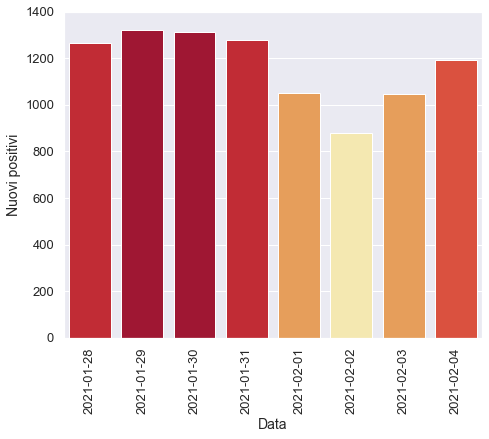

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

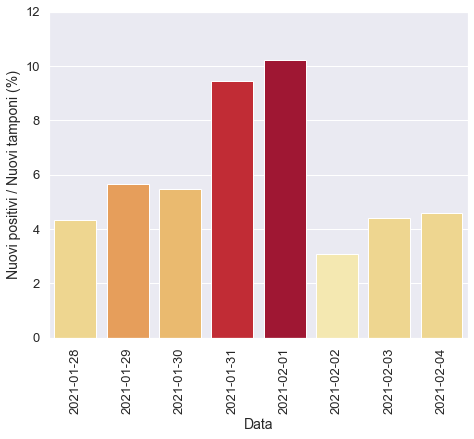

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

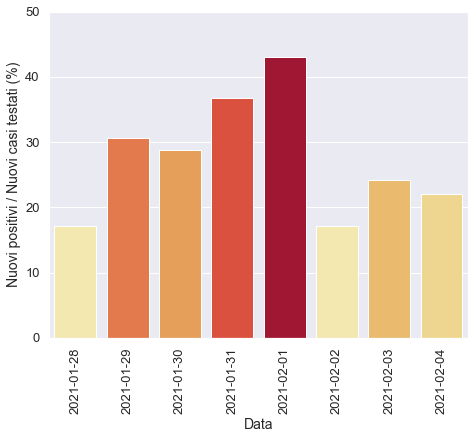

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

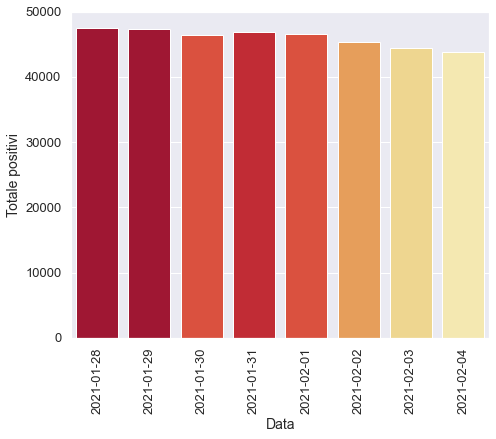

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

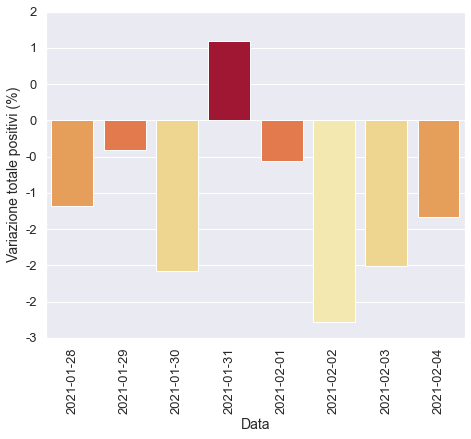

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

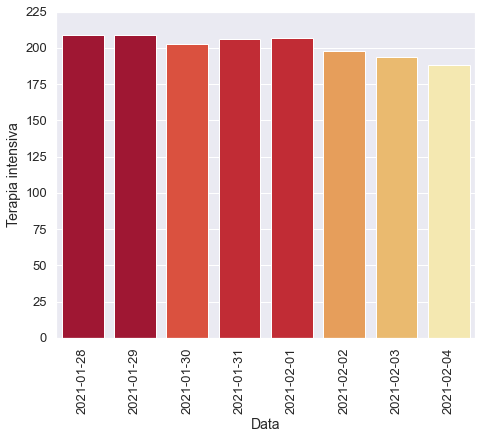

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

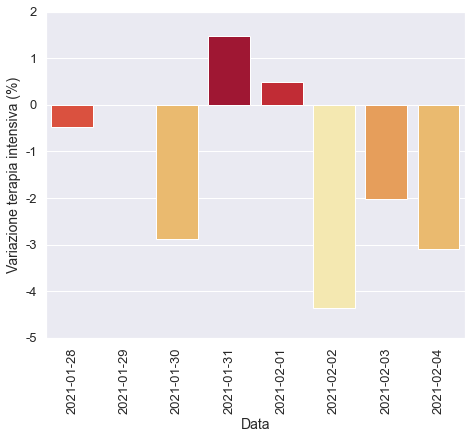

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

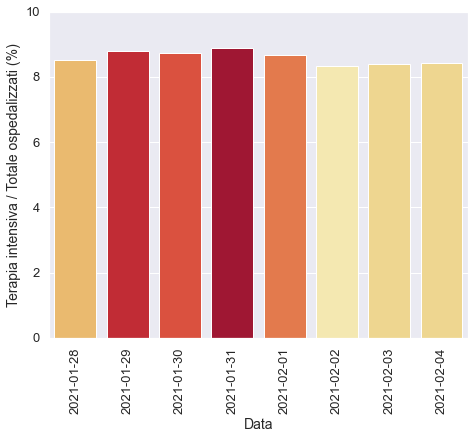

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

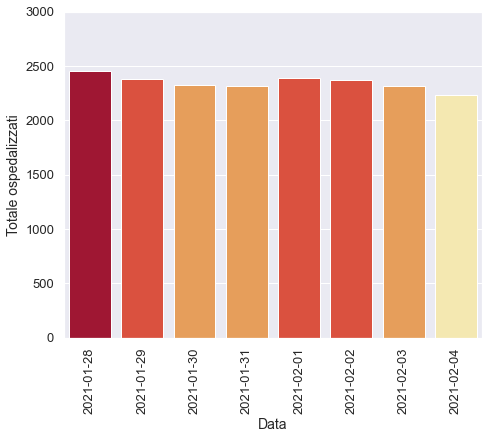

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

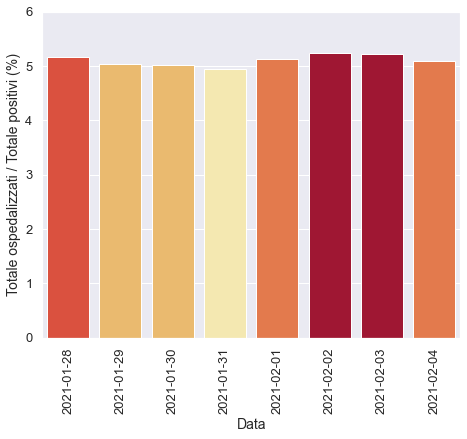

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

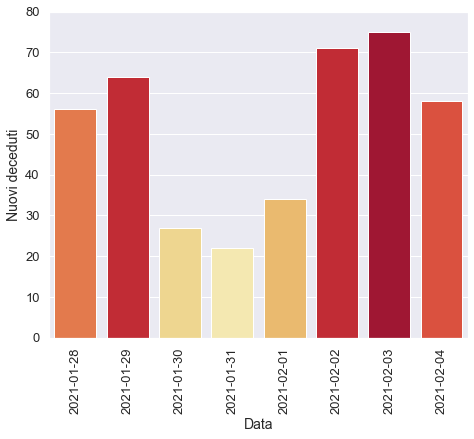

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

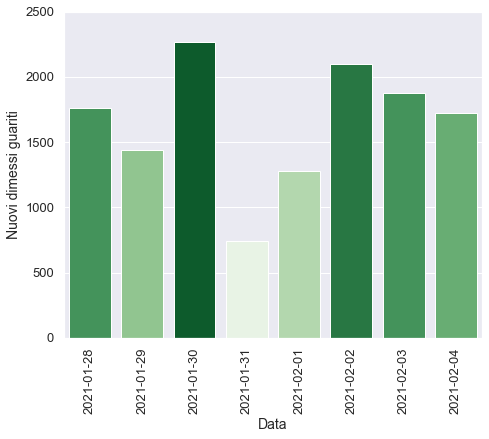

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)